# Mnist Digit Recognition

In [4]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [5]:
# Importing the MNist dataset
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

#Checking...
print(len(x_train))

print(x_train[0].shape)

60000
(28, 28)


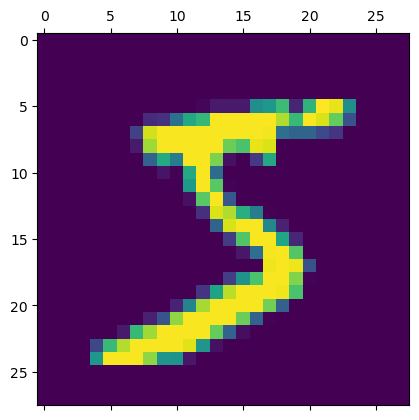

In [6]:
#Printing...
plt.matshow(x_train[0])

In [7]:
y_train[0]

5

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
# Scale the data for values to lie between 0 and 1
x_train=x_train/255.0
x_test=x_test/255.0

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
# Flattening the data set
x_train=x_train.reshape(len(x_train),28*28)
x_test=x_test.reshape(len(x_test),28*28)

In [13]:
x_train.shape

(60000, 784)

In [24]:
# Creating the neural network
model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                        keras.layers.Dense(10000,activation='relu'),
                        keras.layers.Dense(1000,activation='relu'),
                       keras.layers.Dense(10,activation='softmax')])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10000)             1010000   
                                                                 
 dense_7 (Dense)             (None, 1000)              10001000  
                                                                 
 dense_8 (Dense)             (None, 10)                10010     
                                                                 
Total params: 11,099,510
Trainable params: 11,099,510
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the network
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Fitting
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.6702 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.2824 - accuracy: 0.9175
Epoch 3/5
1875/1875 [==============================] - 128s 68ms/step - loss: 0.2262 - accuracy: 0.9342
Epoch 4/5
1875/1875 [==============================] - 120s 64ms/step - loss: 0.1900 - accuracy: 0.9447
Epoch 5/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.1637 - accuracy: 0.9522


In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.1515 - accuracy: 0.9541


[0.1514570116996765, 0.9541000127792358]

In [28]:
# Getting a heat map for checking the validation
y_predict=model.predict(x_test)
y_predict_labels=[np.argmax(i) for i in y_predict]

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)

313/313 [==============================] - 4s 11ms/step


Text(95.72222222222221, 0.5, 'Truth')

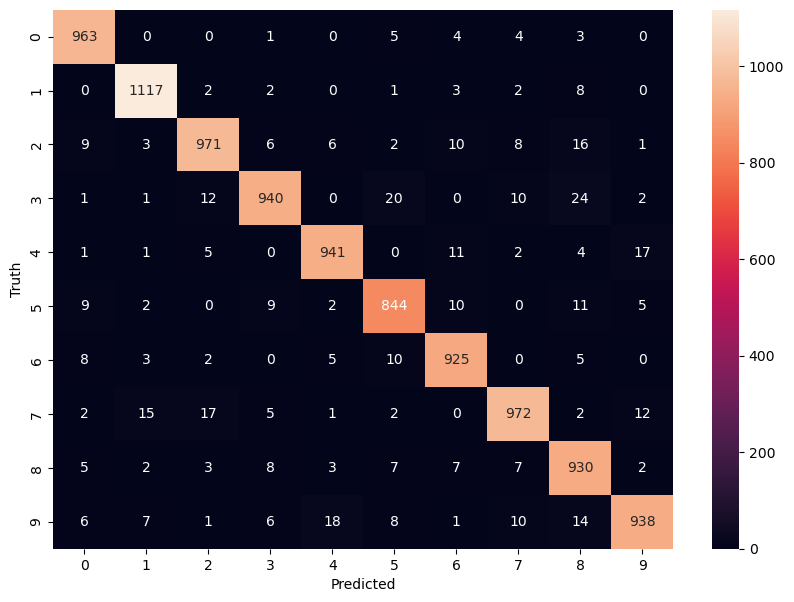

In [34]:
# Displaying the heatmap
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')